In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,recall_score ,accuracy_score,precision_score, roc_auc_score

# Загрузка данных
df = pd.read_csv("data/bank-additional-full.csv", sep=';')

# Преобразование целевой переменной
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Разделение признаков на числовые и категориальные
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features.remove('y')  # Исключаем целевой признак

In [88]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [89]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

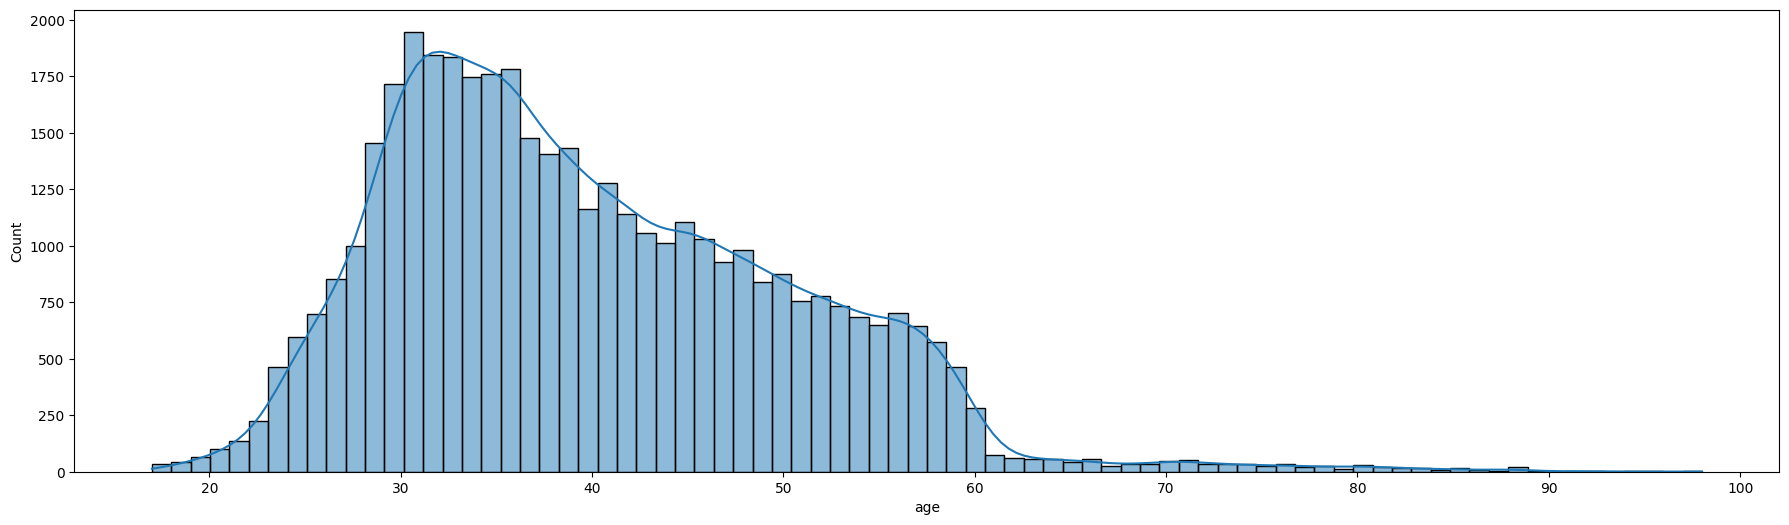

In [90]:
#age histogram

plt.figure(figsize=(22, 6))
sns.histplot(df['age'], kde=True, bins=80)
plt.show()

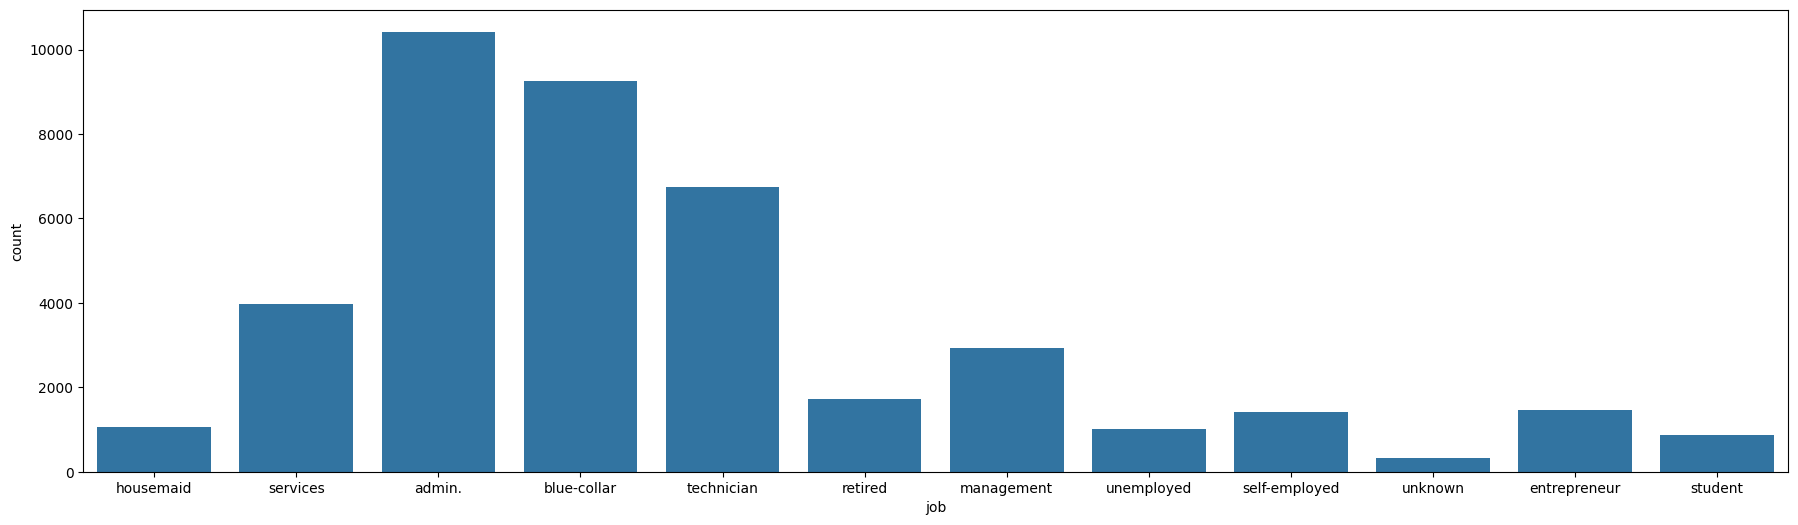

In [91]:
# job bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='job', data=df)
plt.show()

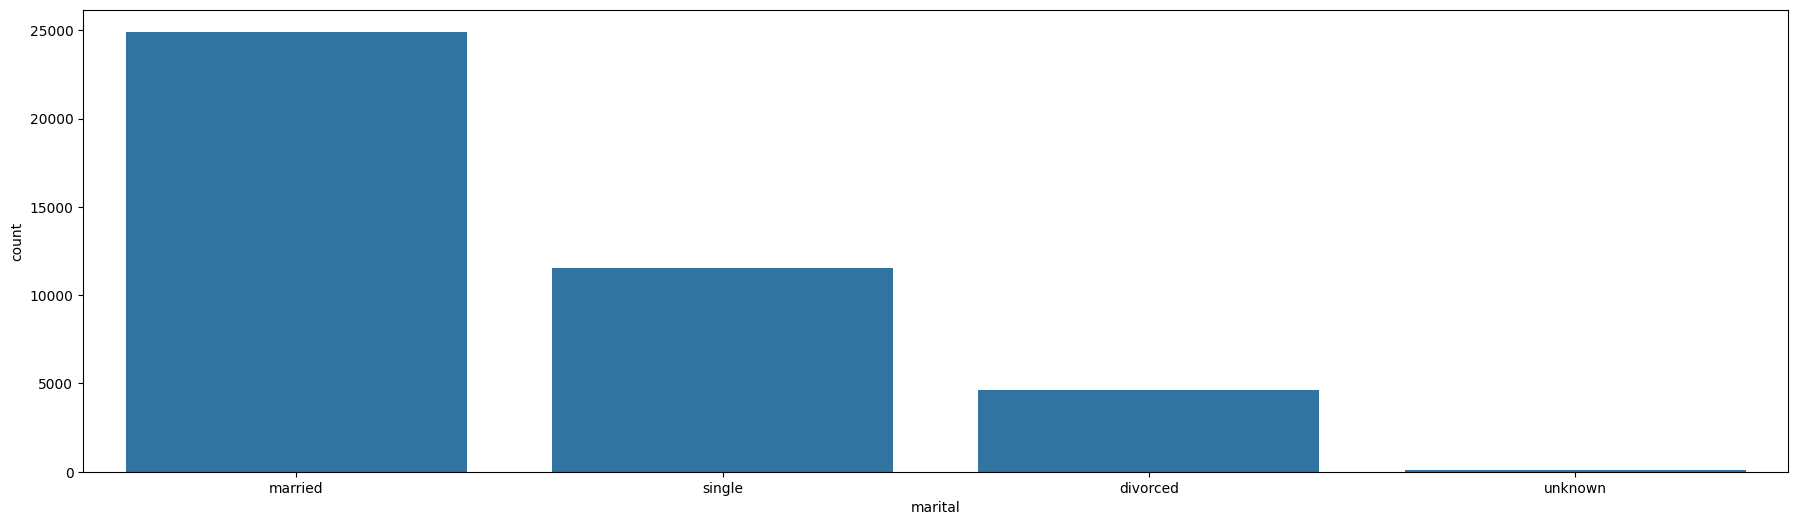

In [93]:
#marital bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='marital', data=df)
plt.show()

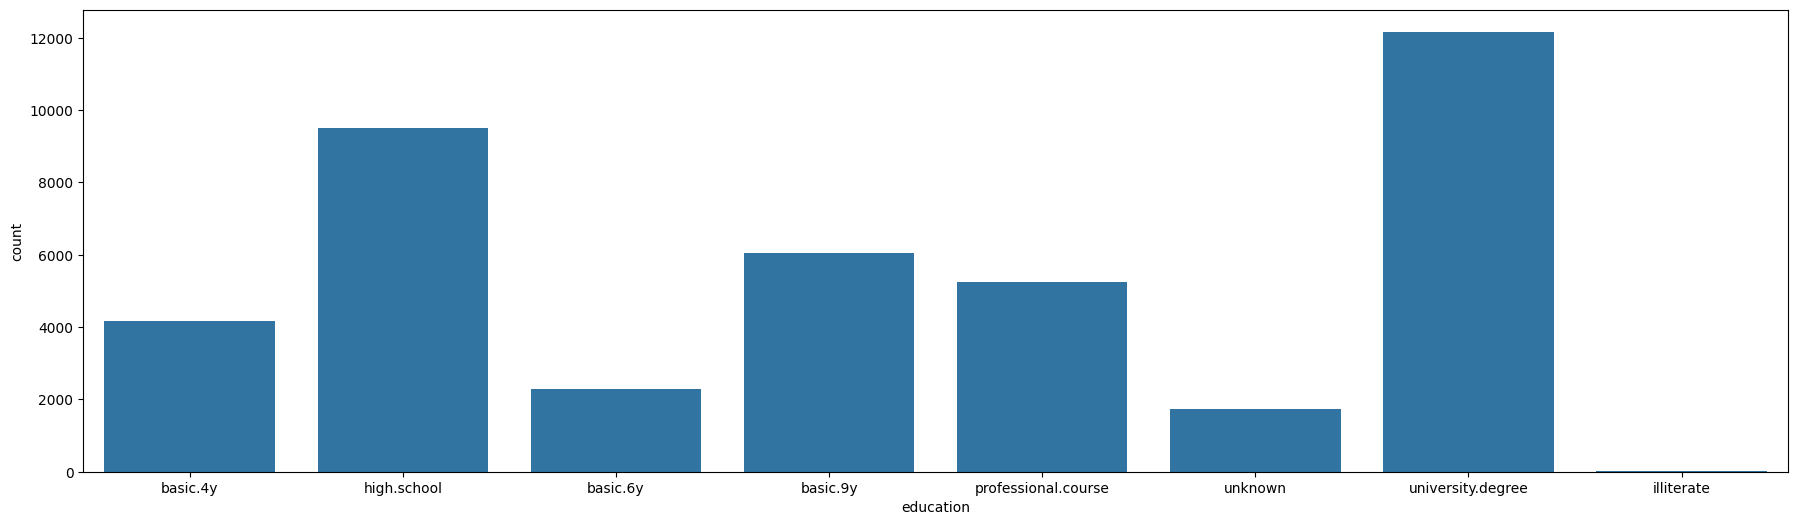

In [95]:
#education bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='education', data=df)
plt.show()

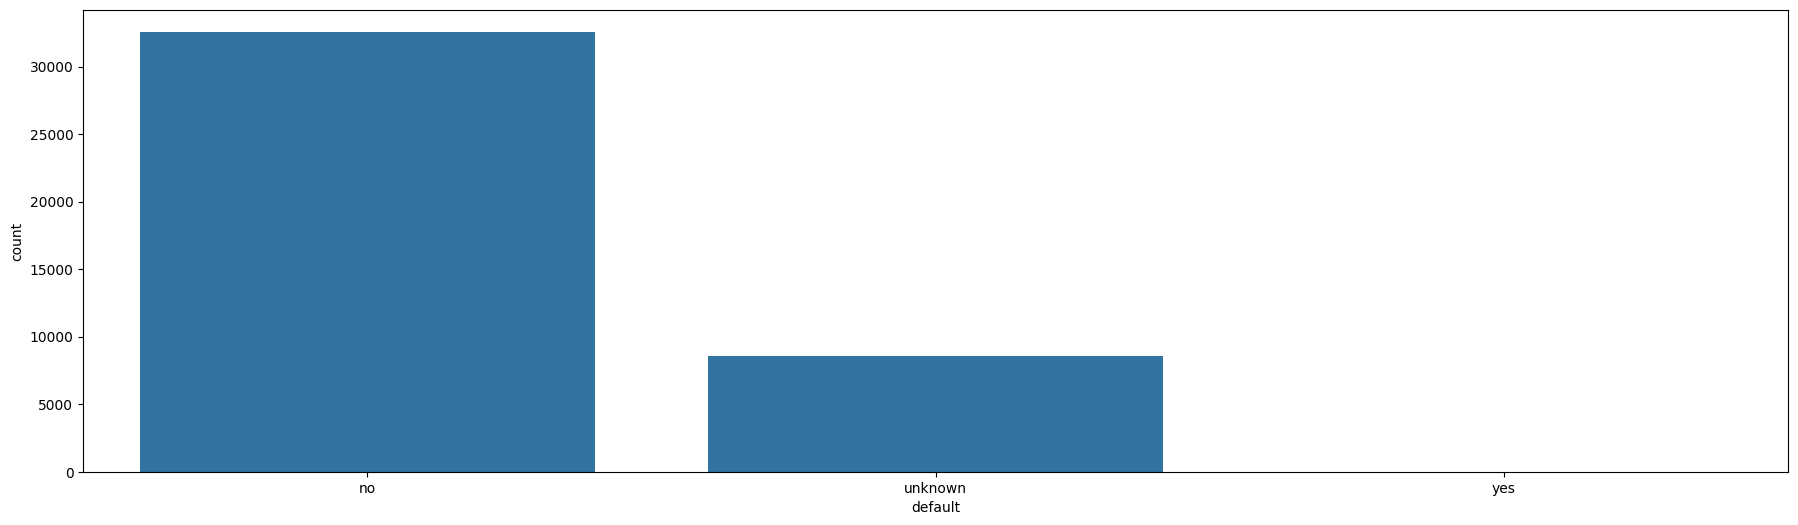

In [96]:
#default bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='default', data=df)
plt.show()

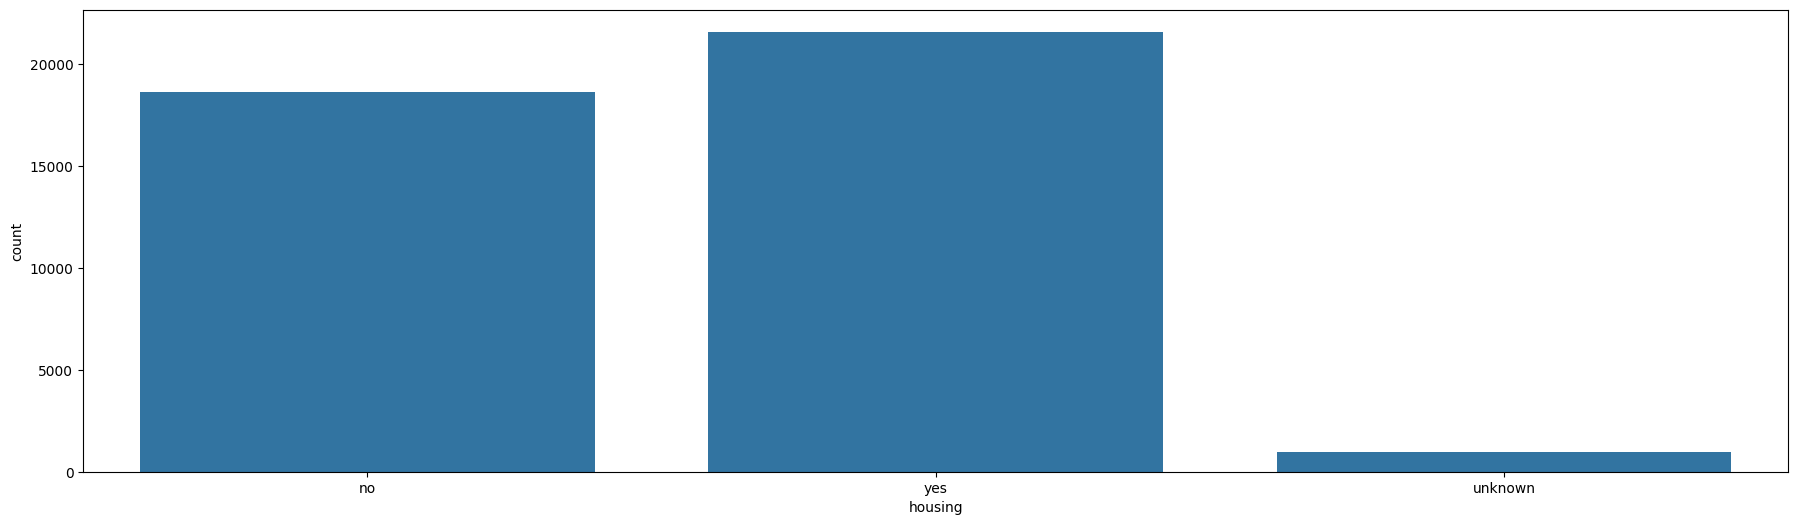

In [97]:
#housing bar plot

plt.figure(figsize=(22, 6)) 
sns.countplot(x='housing', data=df)
plt.show()

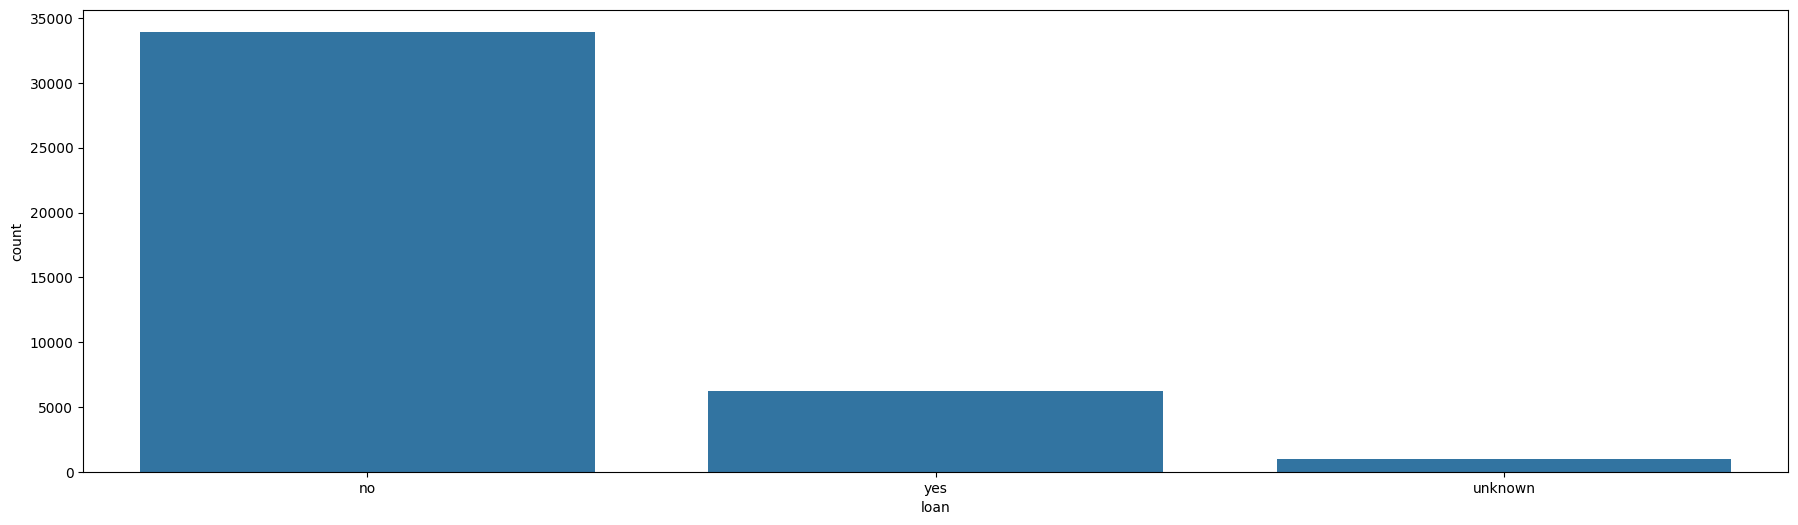

In [98]:
#loan bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='loan', data=df)
plt.show()

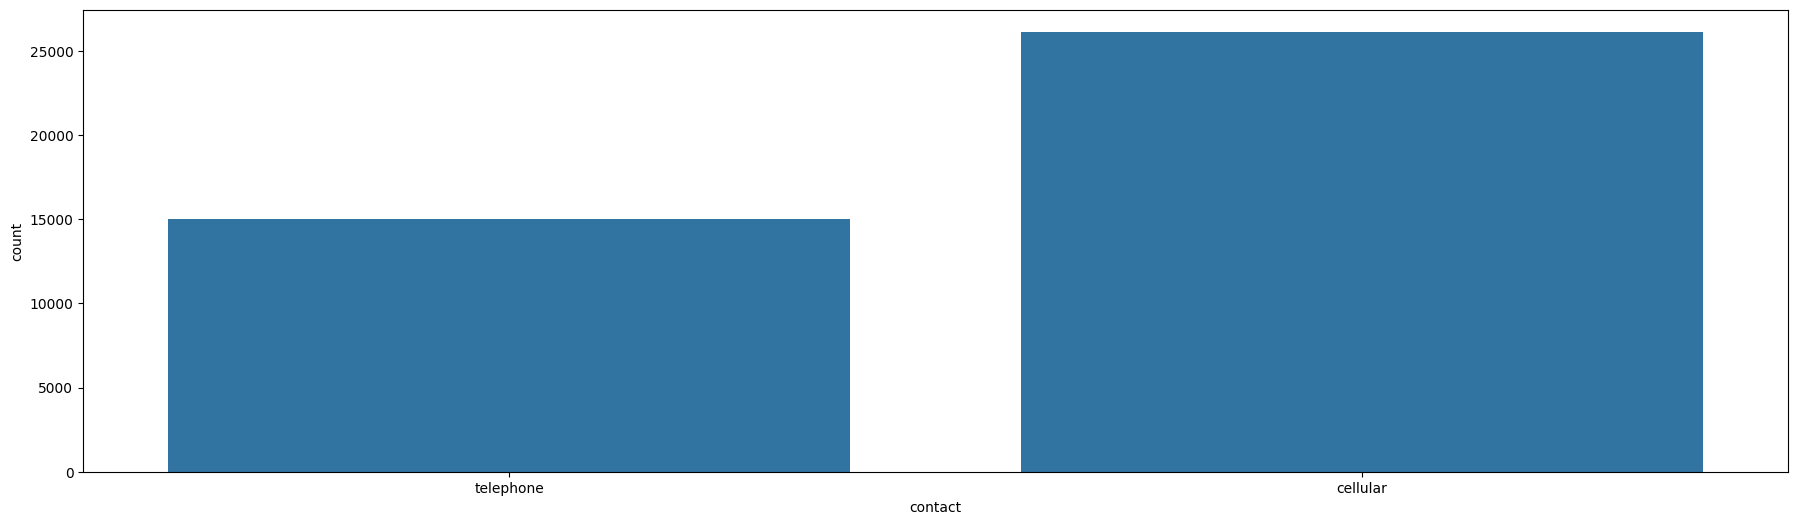

In [99]:
#contact bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='contact', data=df)
plt.show()

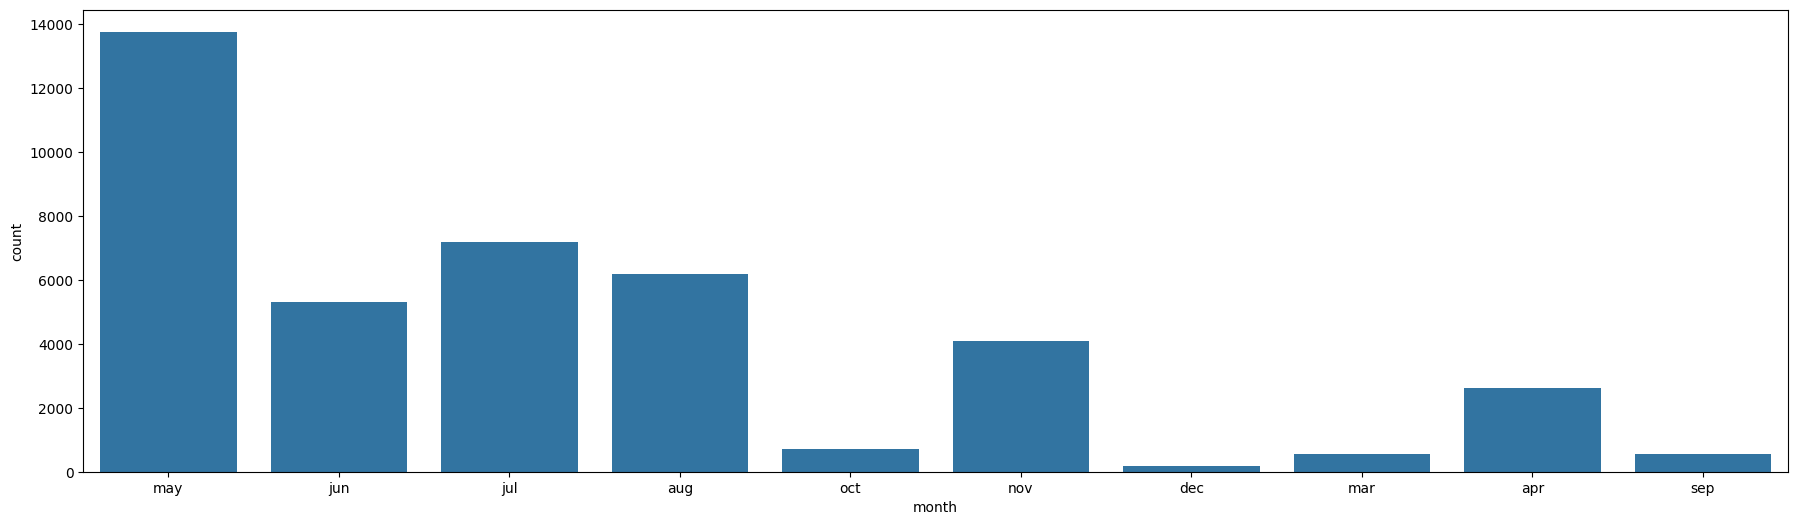

In [100]:
#month bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='month', data=df)
plt.show()  

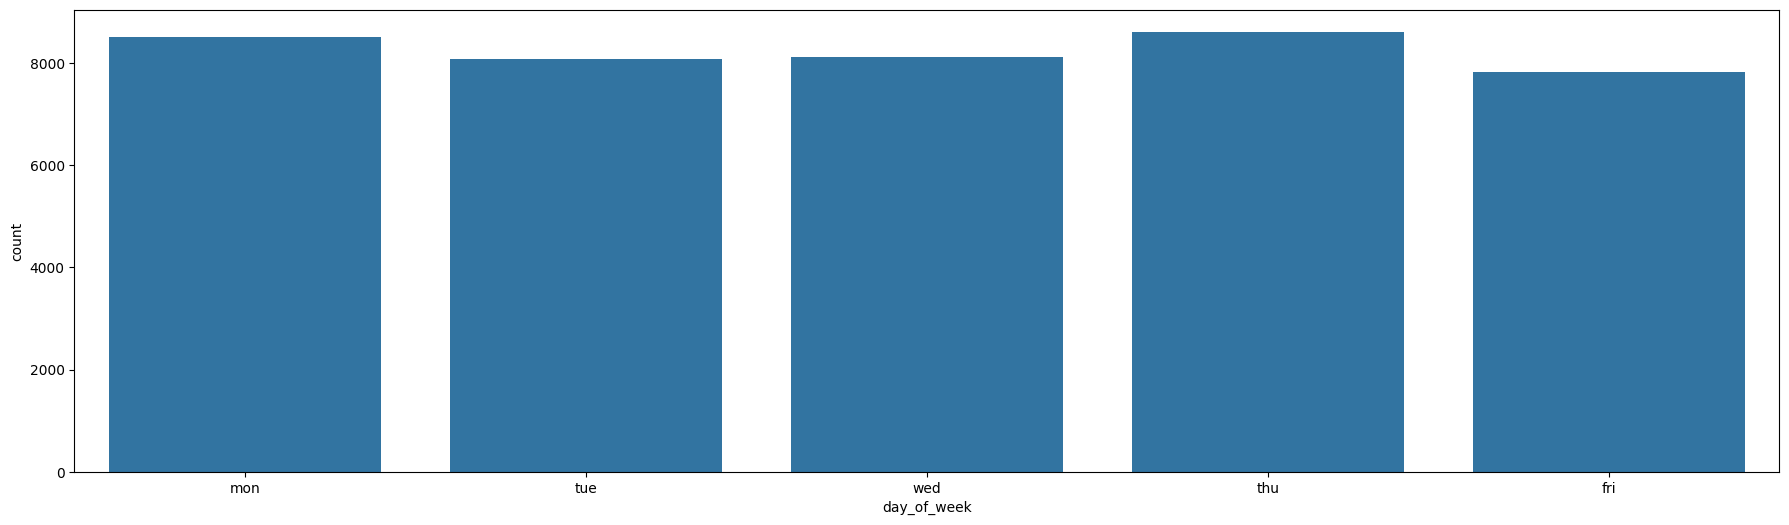

In [101]:
#day_of_week bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='day_of_week', data=df)
plt.show()

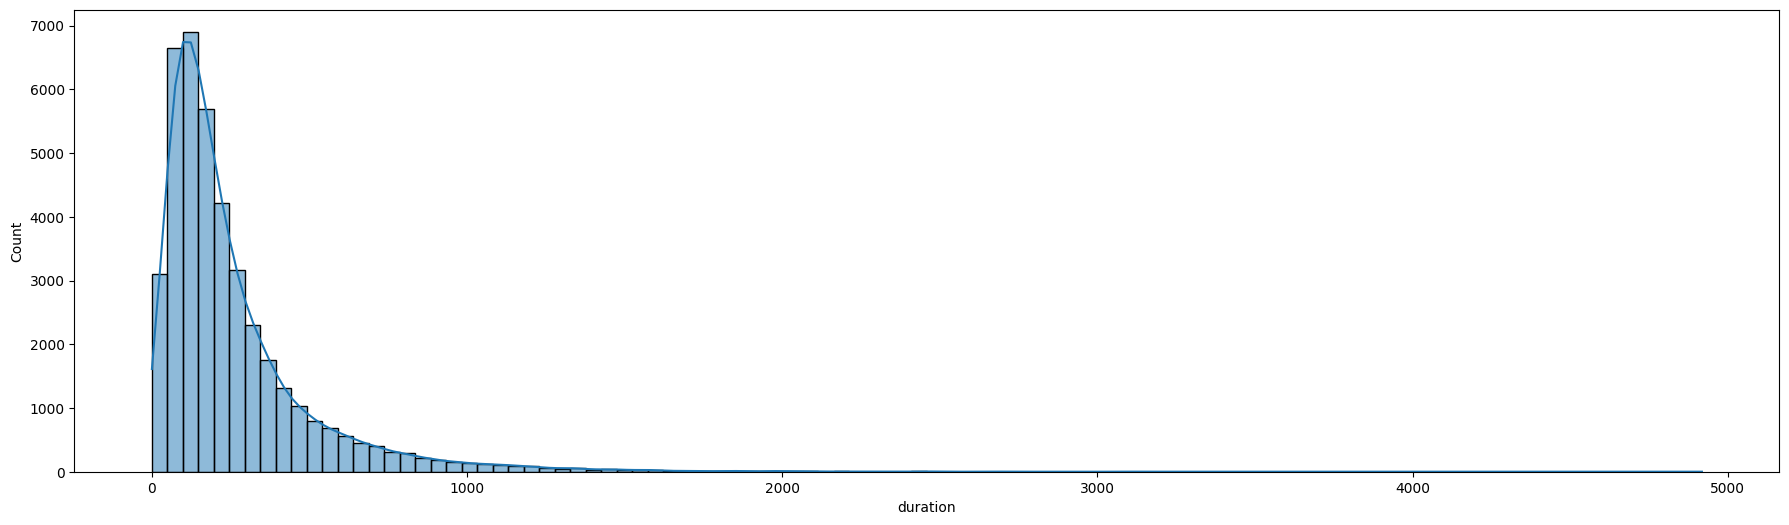

In [102]:
#duration histogram

plt.figure(figsize=(22, 6))
sns.histplot(df['duration'], kde=True, bins=100)
plt.show()

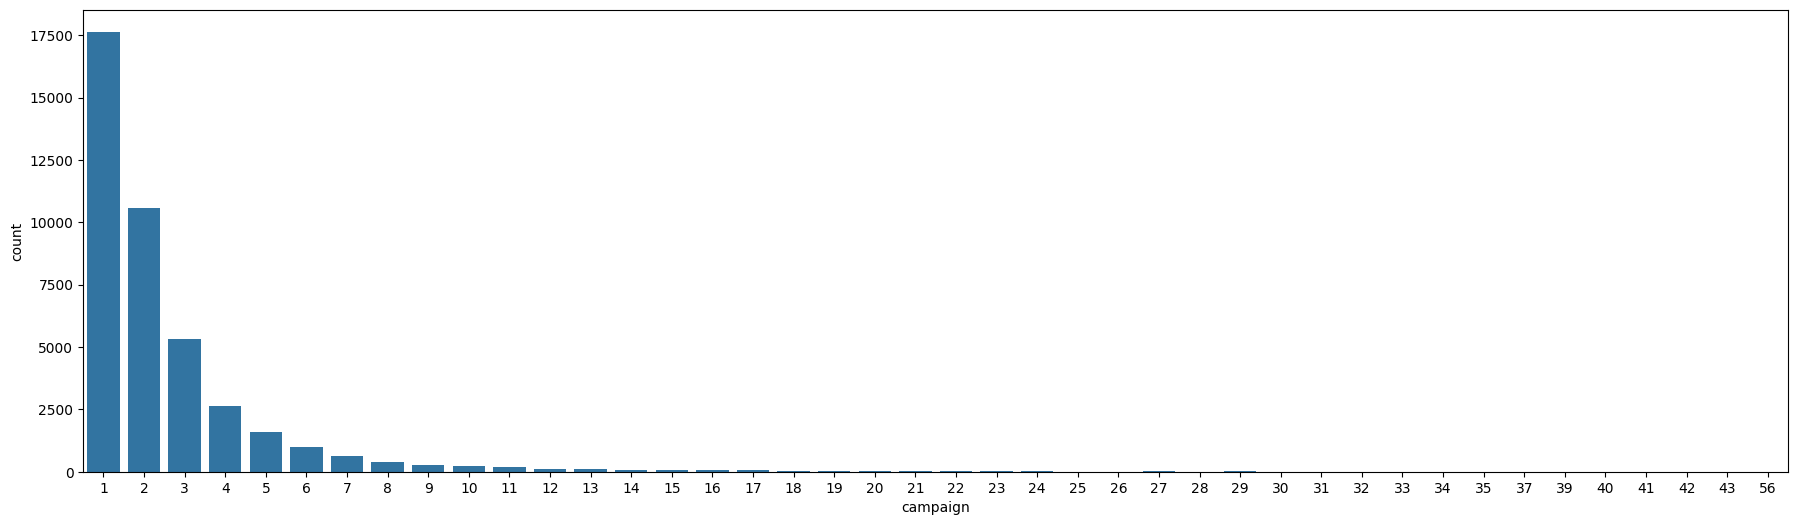

In [103]:
#campaign count plot

plt.figure(figsize=(22, 6)) 
sns.countplot(x='campaign', data=df)
plt.show()

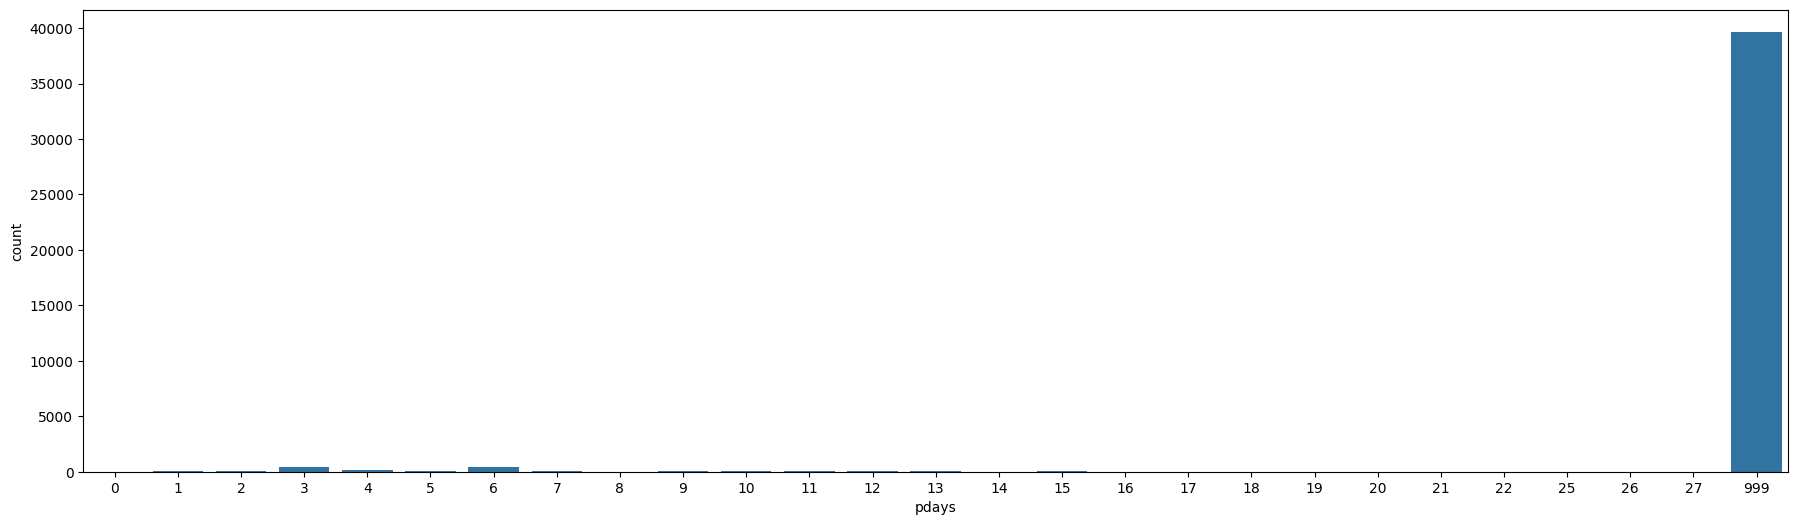

In [104]:
#pdays count plot

plt.figure(figsize=(22, 6))
sns.countplot(x='pdays', data=df)
plt.show()

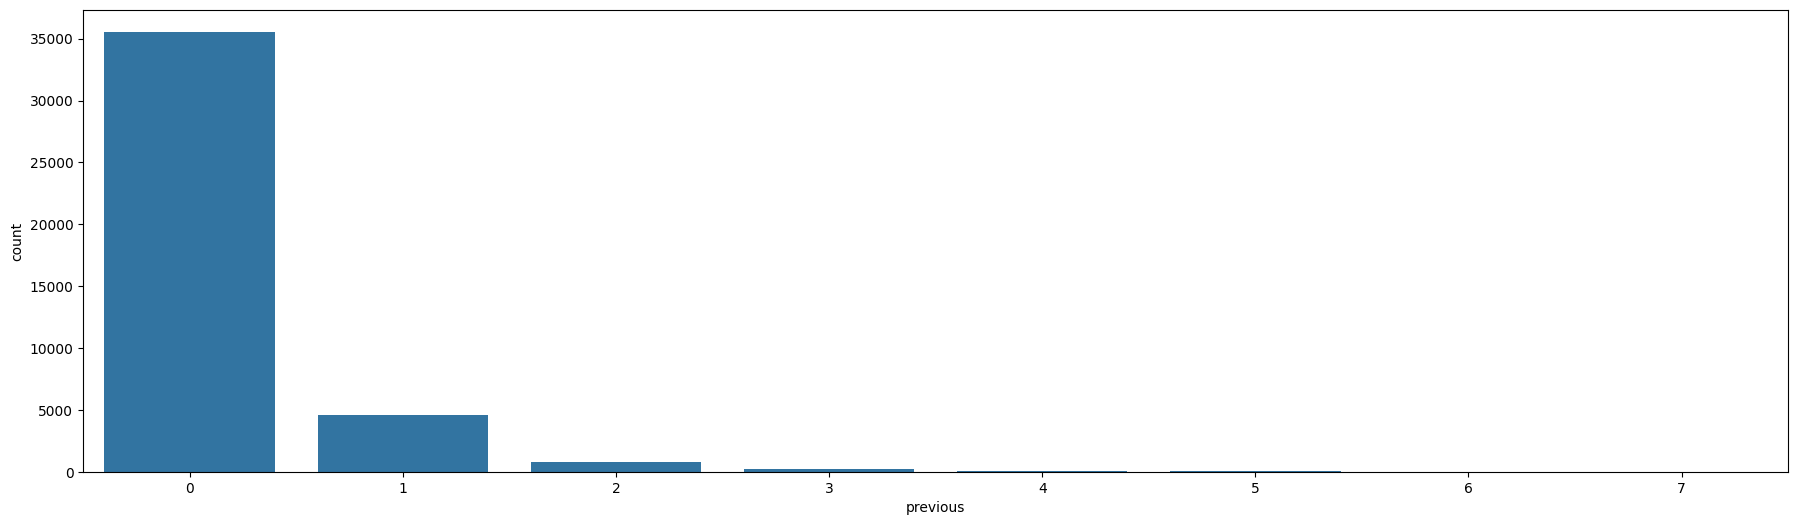

In [105]:
#previous count plot

plt.figure(figsize=(22, 6))
sns.countplot(x='previous', data=df)    
plt.show()

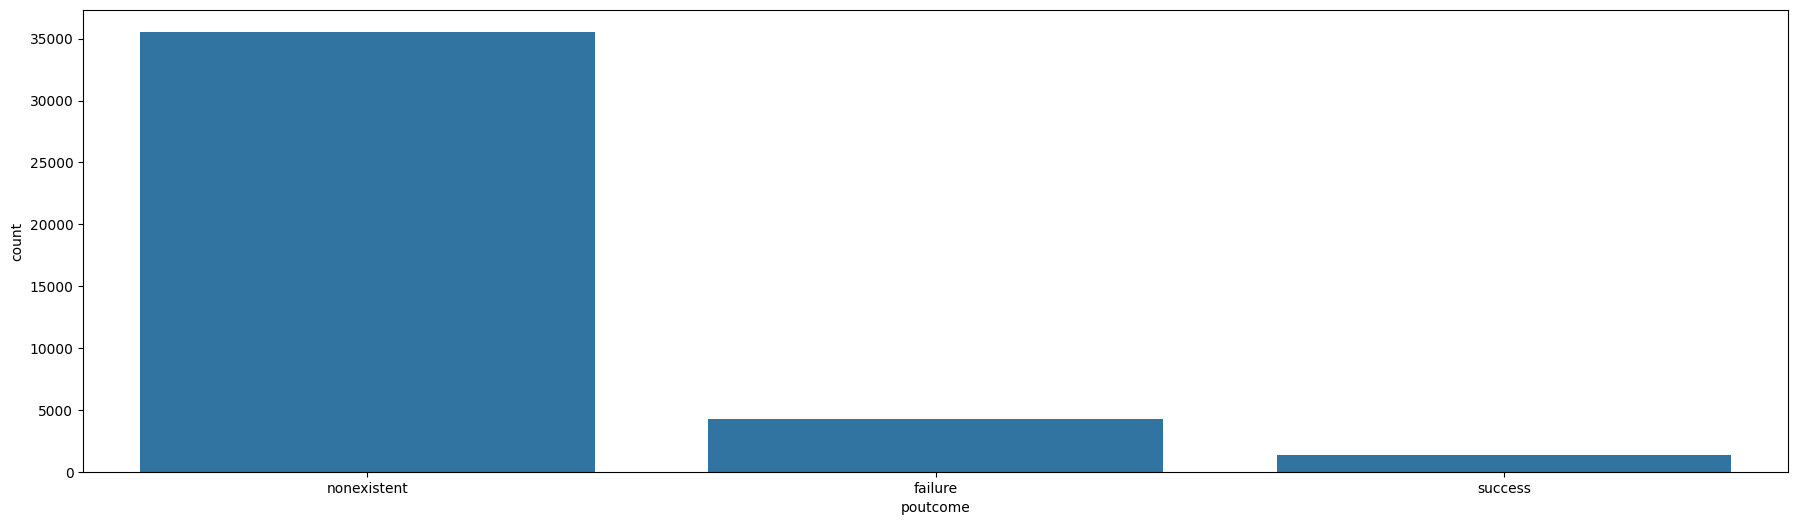

In [106]:
#poutcome bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='poutcome', data=df)
plt.show()

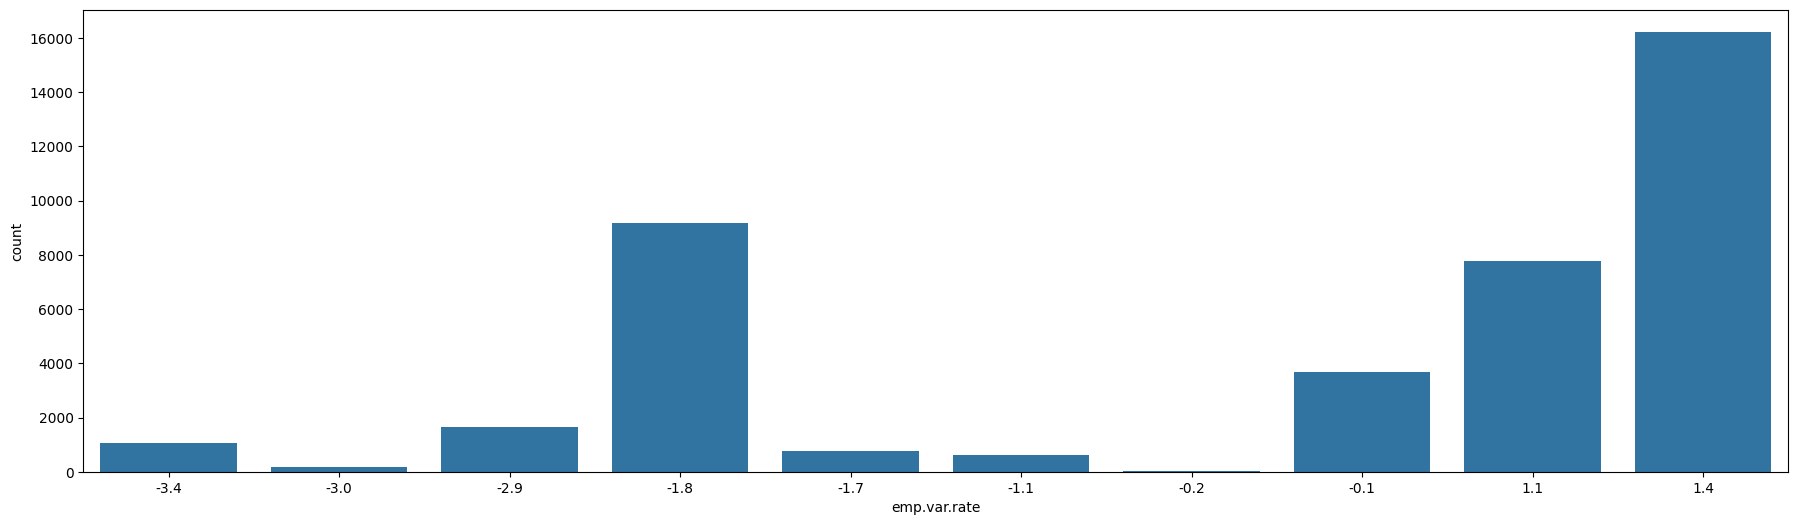

In [107]:
#emp.var.rate bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='emp.var.rate', data=df)
plt.show()

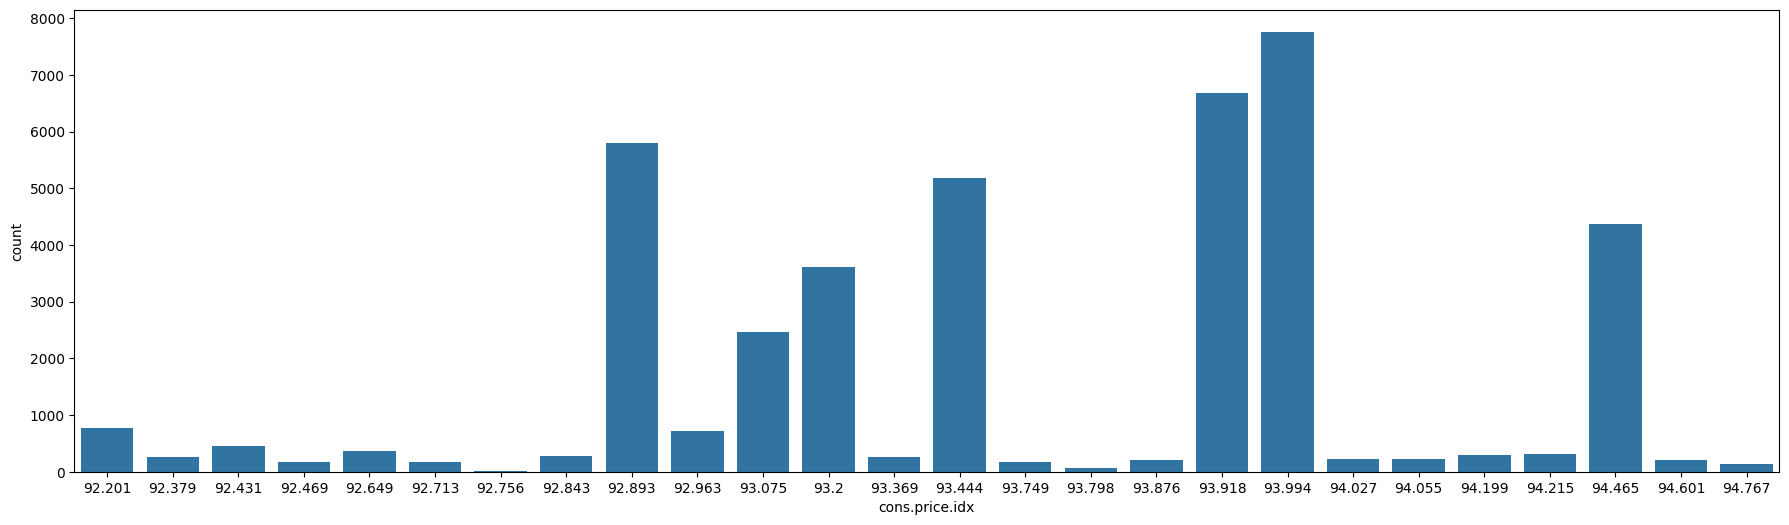

In [108]:
#cons.price.idx bar plot

plt.figure(figsize=(22, 6)) 
sns.countplot(x='cons.price.idx', data=df)
plt.show()

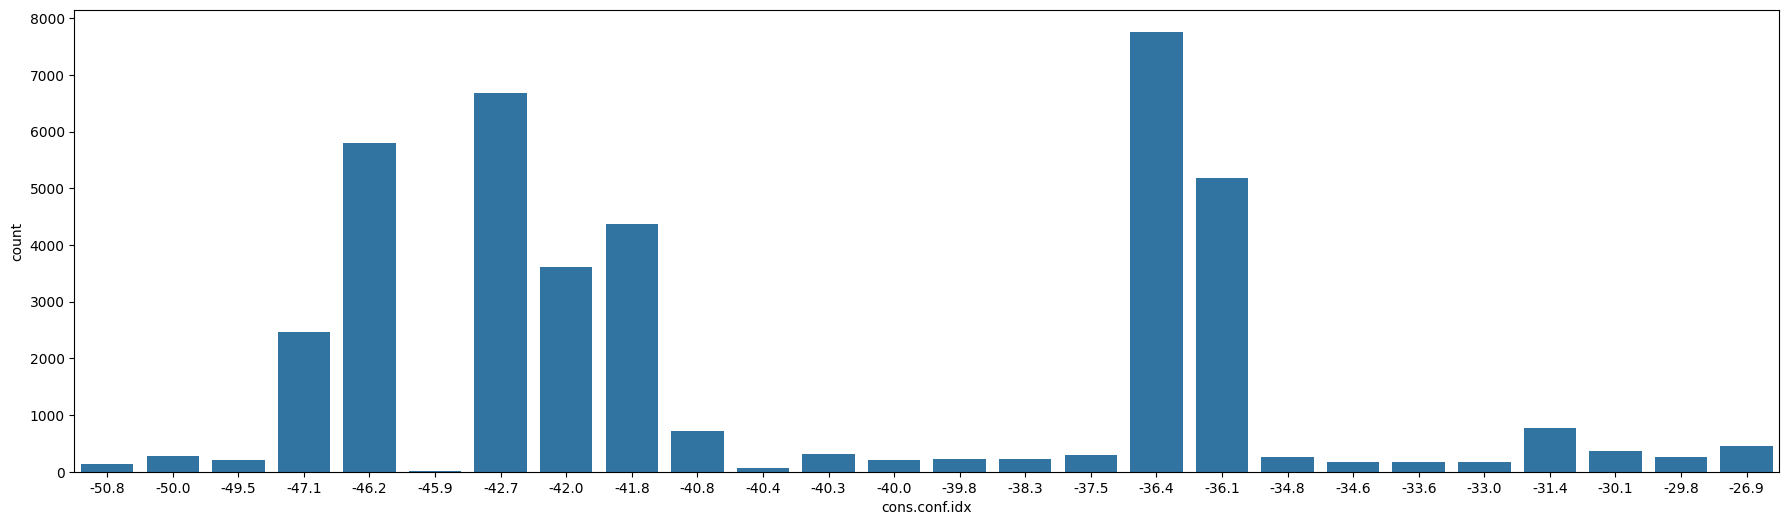

In [109]:
#cons.conf.idx bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='cons.conf.idx', data=df)
plt.show()

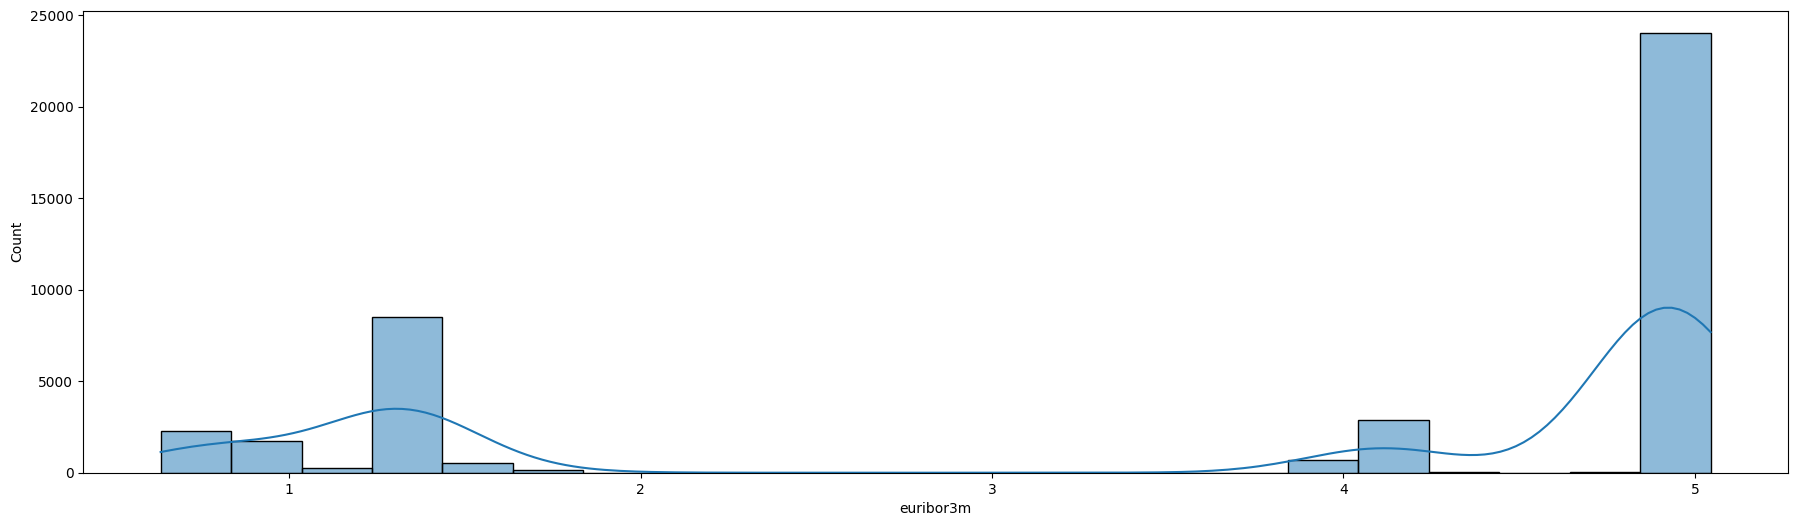

In [110]:
#euribor3m histogram

plt.figure(figsize=(22, 6))
sns.histplot(df['euribor3m'], kde=True)
plt.show()

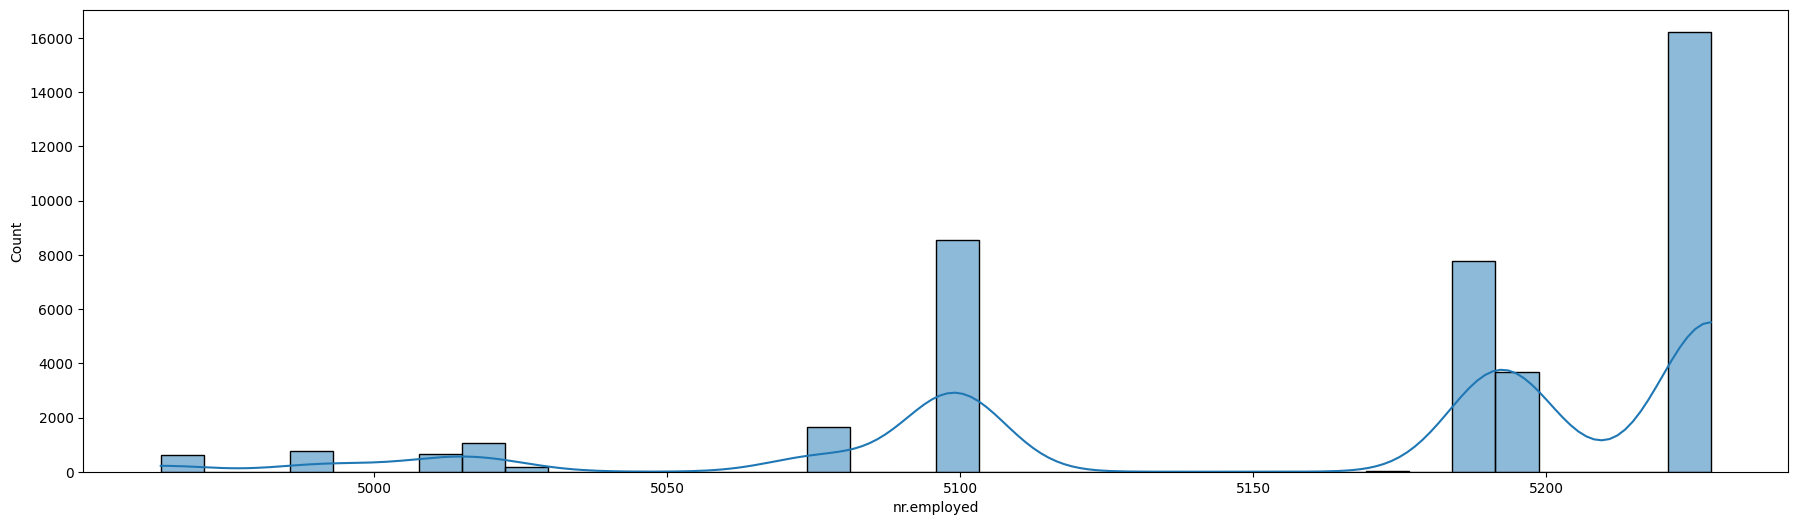

In [111]:
#nr.employed histogram

plt.figure(figsize=(22, 6))
sns.histplot(df['nr.employed'], kde=True)
plt.show()

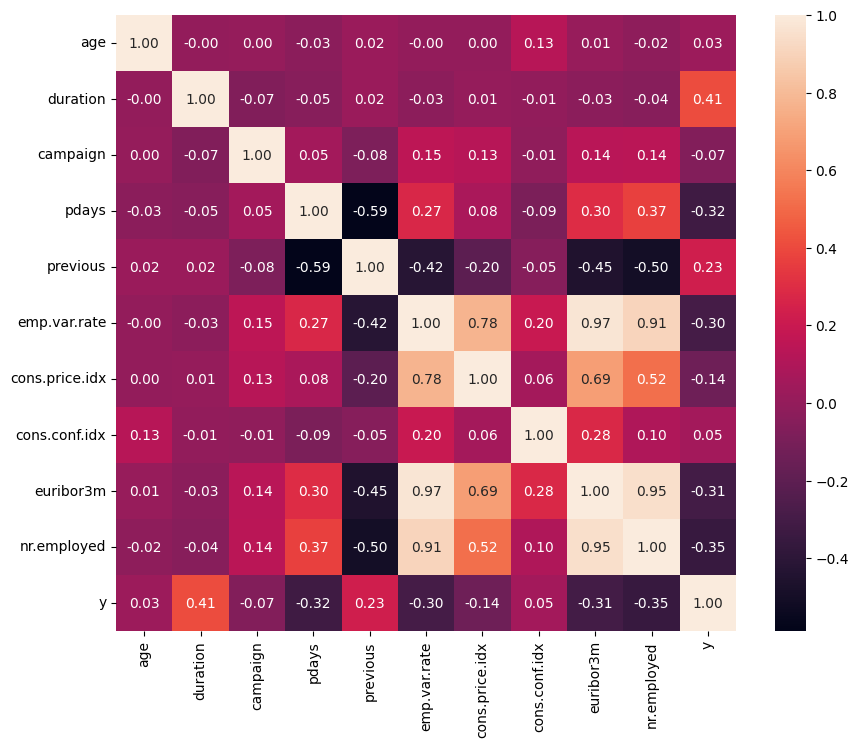

In [112]:
#corr matrix only for numberical and y
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_features + ['y']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

<Figure size 1000x600 with 0 Axes>

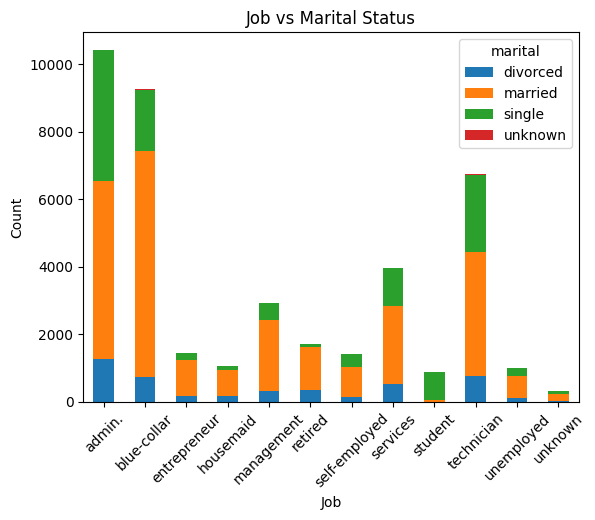

In [113]:
plt.figure(figsize=(10, 6))
pd.crosstab(df['job'], df['marital']).plot(kind='bar', stacked=True)
plt.title('Job vs Marital Status')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [114]:
# Разделение данных
X = df.drop(columns=['y'])
y = df['y']

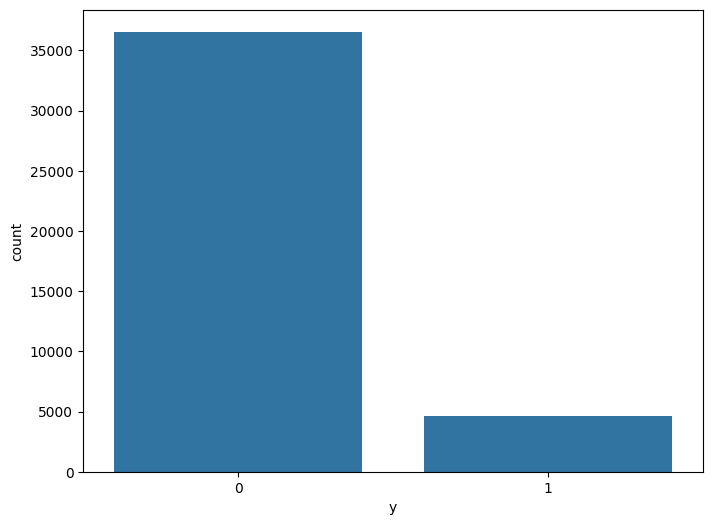

In [115]:
#figure fo count of y matplotlib

plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.show()

In [116]:
X[numerical_features] = StandardScaler().fit_transform(X[numerical_features])

N = OneHotEncoder(handle_unknown='ignore').fit_transform(X[categorical_features])
N = pd.DataFrame(N.toarray())

X = pd.concat([X[numerical_features], N], axis=1)
X.columns = X.columns.astype(str)

In [117]:
#smote model
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __init__


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [120]:
# Оценка модели
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8862517099863201
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      7332
           1       0.87      0.91      0.89      7288

    accuracy                           0.89     14620
   macro avg       0.89      0.89      0.89     14620
weighted avg       0.89      0.89      0.89     14620



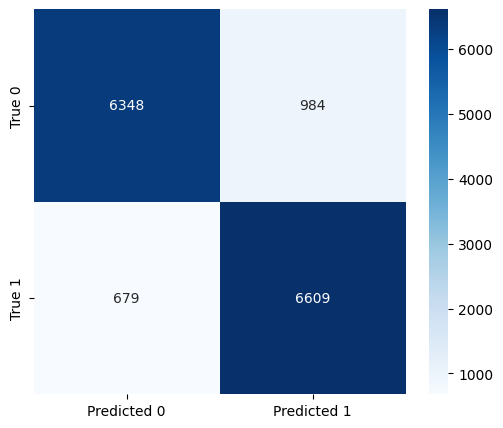

In [121]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.show()